# Random forest classifier

Method implementation and results comparison for 25 points.

Evaluation of the implemented method on the standard dataset and comparison of the results with standard implementation (2-4h).

In [4]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
plt.style.use('ggplot')

In [6]:
x, y = make_classification(n_samples=300, n_features=5, n_informative=3, n_classes=3, n_redundant=0, random_state=42)
df = pd.DataFrame(data=x)
df['class'] = y
df.head()

,0,1,2,3,4,class
0,0.535996,0.215099,0.148667,1.255488,-0.337086,0
1,-1.007492,-3.018286,1.227669,-0.295163,-1.209641,0
2,0.949206,-0.194437,0.840644,0.216492,-0.652624,0
3,0.853769,0.592883,-0.213443,0.402676,1.490726,0
4,2.245707,-1.718681,1.148766,1.584767,-1.739714,1


In [7]:
train, test = train_test_split(df)

display(train.shape)
display(test.shape)

(225, 6)

(75, 6)

In [11]:
%run DecisionTree.py
dt = DecisionTree()
dt.fit(train)
score = dt.score(test)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(train.drop('class', axis=1), train['class'])
other_score = dtc.score(test.drop('class', axis=1), test['class'])

display("My score={}, Other={}".format(score, other_score))

'My score:'

0.8133333333333334

'Other:'

0.8

In [16]:
%run RandomForest
from sklearn.ensemble import RandomForestClassifier

n_trees = [1, 2, 3, 5, 10, 15, 20, 30]
scores = []
other_scores = []

for n in n_trees:
    rf = RandomForest(n_trees=n, seed=42)
    rf.fit(train)
    score = rf.score(test)
    scores.append(score)
    
    rfc = RandomForestClassifier(n_estimators=n, random_state=42)
    rfc.fit(train.drop('class', axis=1), train['class'])
    other_score = rfc.score(test.drop('class', axis=1), test['class'])
    other_scores.append(other_score)
    display("N={} My score={}, Other={}".format(n, score, other_score))

'N=1 My score=0.7333333333333333, Other=0.7733333333333333'

'N=2 My score=0.7333333333333333, Other=0.68'

'N=3 My score=0.76, Other=0.7466666666666667'

'N=5 My score=0.7466666666666667, Other=0.8'

'N=10 My score=0.8533333333333334, Other=0.8266666666666667'

'N=15 My score=0.8266666666666667, Other=0.8133333333333334'

'N=20 My score=0.8533333333333334, Other=0.8'

'N=30 My score=0.8666666666666667, Other=0.8266666666666667'

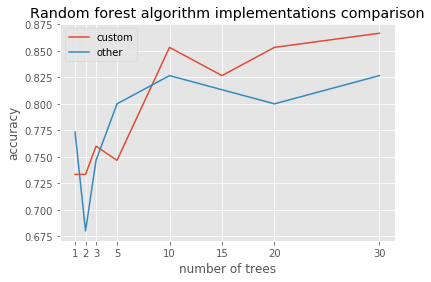

In [20]:
plt.plot(n_trees, scores, label="custom")
plt.plot(n_trees, other_scores, label="other")
plt.xticks(n_trees)
plt.title("Random forest algorithm implementations comparison")
plt.xlabel("number of trees")
plt.ylabel("accuracy")
plt.legend()
plt.show()